# E-Commerce Behavior Dataset Initial Exploration

In [93]:
%load_ext autoreload
%autoreload 2

#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
# Initialization of Dataset

df = pd.read_csv("../data/cleaned/cleaned_data.csv", parse_dates=['event_time'])

# Data Exploration and Questions 

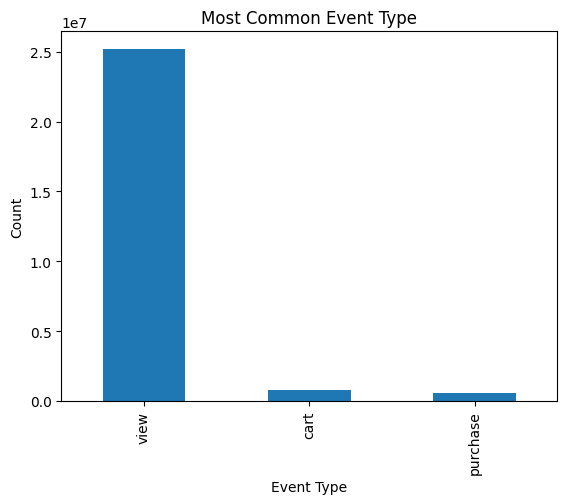

In [95]:
import matplotlib.pyplot as plt

#1 What is the most common event type?

event_counts = df['event_type'].value_counts()

event_counts.plot(
    kind='bar',
    title='Most Common Event Type',
    xlabel='Event Type',
    ylabel='Count'
)

plt.show()


In [96]:
#2 What is the price variation for each product category and the category with the highest price variation?

price_std_per_category = df.groupby('category_code')['price'].std()

# Print price variation for each product category
print("Price Variation per Product Category:")
print(price_std_per_category)

# Identify the category with the highest price variation
highest_var_category = price_std_per_category.idxmax()
highest_price_variation = price_std_per_category.max()

print(f"Category with the highest price variation: {highest_var_category} (Std: ${highest_price_variation:.2f})")


Price Variation per Product Category:
category_code
accessories.bag          68.678762
accessories.umbrella      0.751208
accessories.wallet       21.023659
apparel.belt             13.437034
apparel.costume          47.638797
                           ...    
sport.ski               225.722317
sport.snowboard         110.065441
sport.tennis             63.594554
sport.trainer           314.677686
stationery.cartrige      54.797557
Name: price, Length: 126, dtype: float64
Category with the highest price variation: electronics.camera.photo (Std: $635.22)


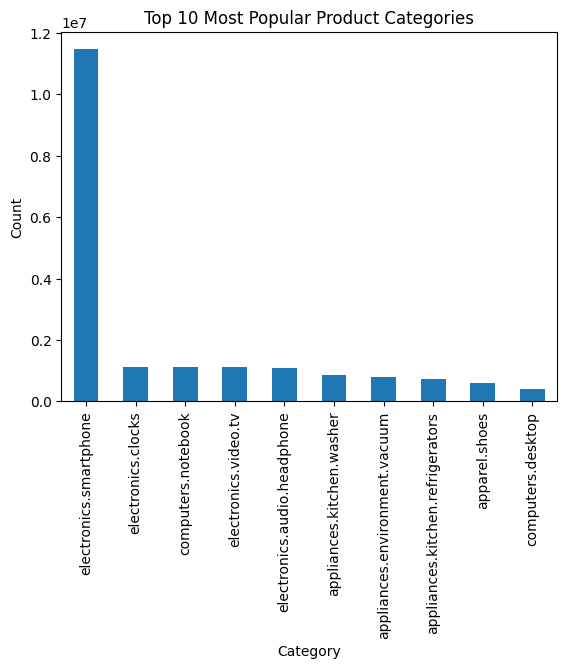

In [97]:
#3 Which product category is the most popular?

category_counts = df['category_code'].value_counts()

# Create the bar plot for the top 10 most popular product categories
category_counts.head(10).plot(
    kind='bar',
    title='Top 10 Most Popular Product Categories',
    xlabel='Category',
    ylabel='Count'
)

plt.show()


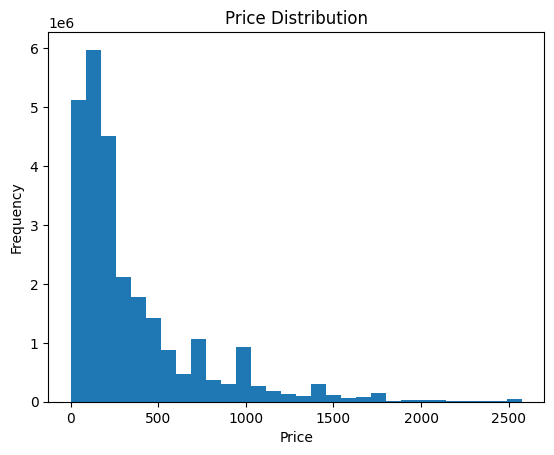

In [98]:
#4 What is the distribution of prices?

df['price'].plot(
    kind='hist',
    bins=30,
    title='Price Distribution'
)
plt.xlabel('Price')
plt.show()


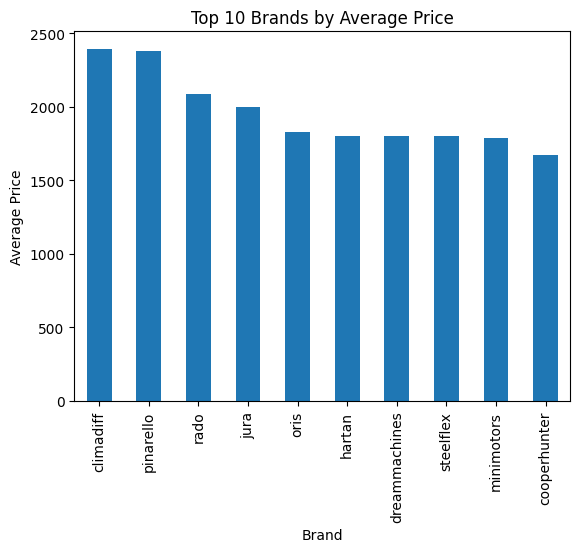

In [99]:
#5 Which brand has the highest average price?

avg_price_per_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Create the bar plot for the top 10 brands by average price
avg_price_per_brand.head(10).plot(
    kind='bar',
    title='Top 10 Brands by Average Price',
    xlabel='Brand',
    ylabel='Average Price'
)

plt.show()

This graph provides valuable insight into brands we should be looking into for the future. Is there a reason as to why their average prices are so high? What do these brands represent? What types of products do they have? How does the average price compare of these brands compare to their overall popularity? These deeper insights in combination with later graphs can be vital in understanding if there's a deeper relationship in combination with other columns. 

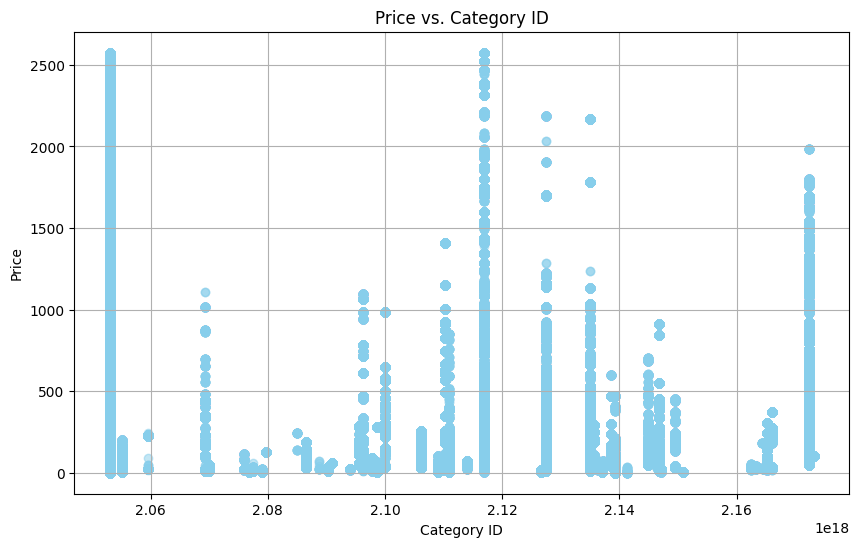

In [100]:
#6 What is the correlation between Price and Category ID?
plt.figure(figsize=(10,6))
plt.scatter(df['category_id'], df['price'], alpha=0.5, color='skyblue')
plt.title('Price vs. Category ID')
plt.xlabel('Category ID')
plt.ylabel('Price')
plt.grid(True)
plt.show()

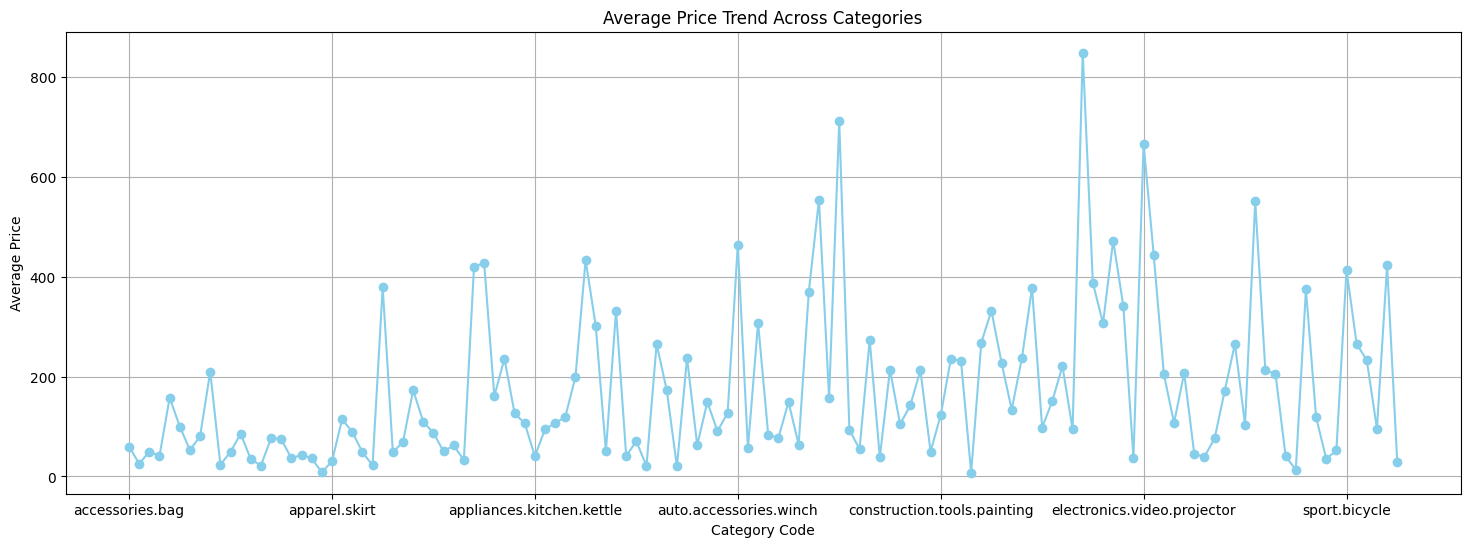

In [101]:
#7 What are the price trends of each category?

average_price_by_category = df.groupby('category_code')['price'].mean()

plt.figure(figsize=(18, 6))
average_price_by_category.plot(
    kind='line',
    marker='o',
    color='skyblue'
)
plt.title('Average Price Trend Across Categories')
plt.xlabel('Category Code')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\1299775473.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


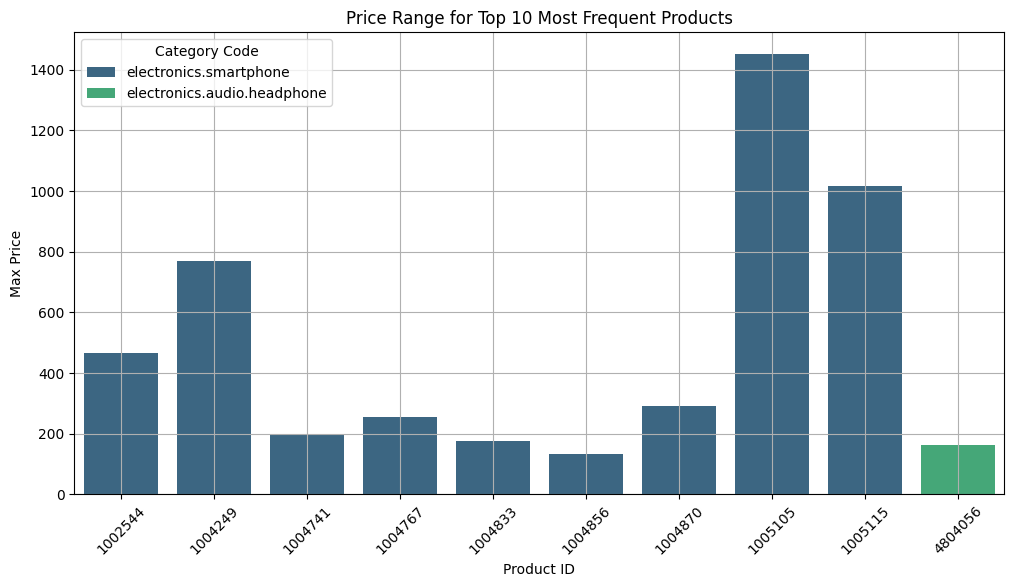

In [102]:
#8 What is the price range for the most frequent products in each category?

product_stats = df.groupby('product_id').agg({
    'price': ['min', 'max'],
    'category_code': 'first'
}).reset_index()

product_stats.columns = ['product_id', 'price_min', 'price_max', 'category_code']
top_products = df.groupby('product_id').size().nlargest(10).index
top_product_stats = product_stats[product_stats['product_id'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_product_stats,
    x='product_id',
    y='price_max',
    hue='category_code',
    palette='viridis',
    ci=None
)
plt.title('Price Range for Top 10 Most Frequent Products')
plt.xlabel('Product ID')
plt.ylabel('Max Price')
plt.xticks(rotation=45)
plt.legend(title='Category Code')
plt.grid(True)
plt.show()


C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\87790460.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


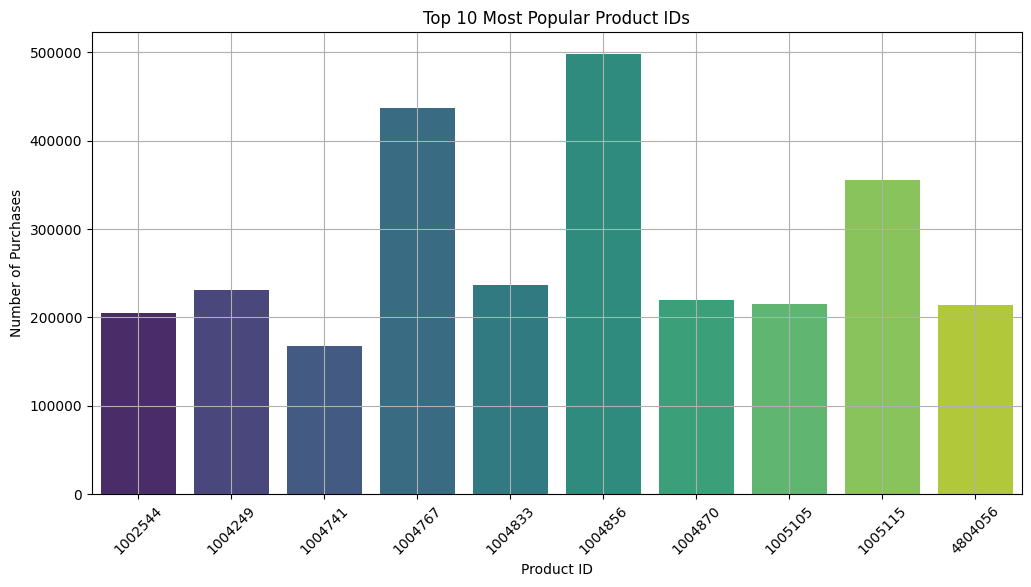

C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\87790460.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


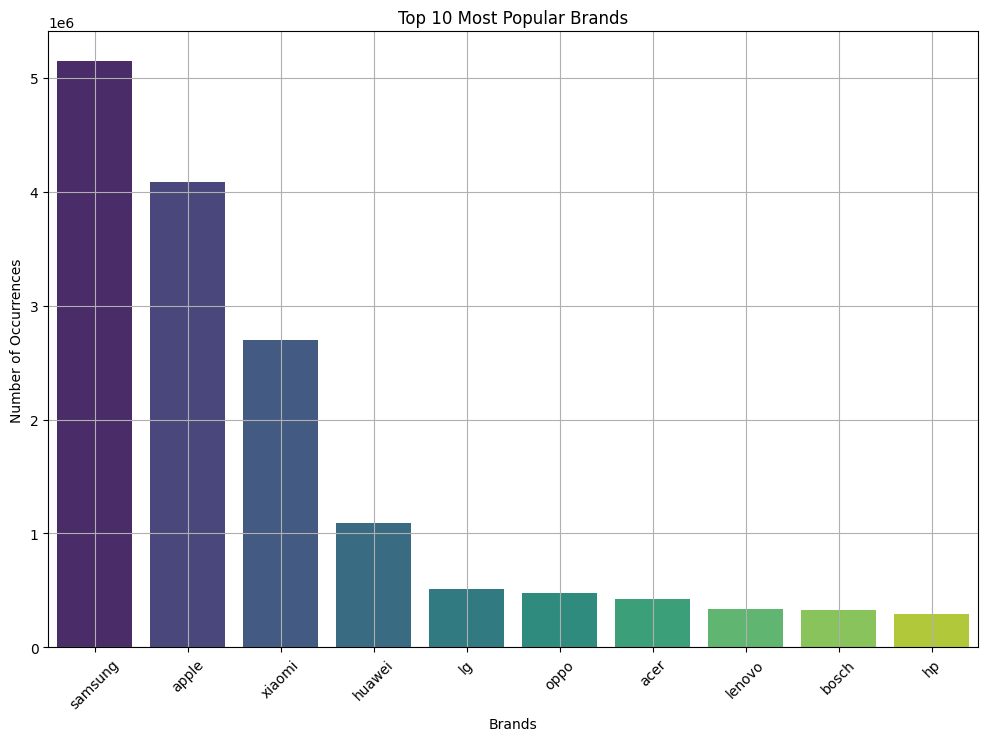

In [103]:
#9 What are the top 10 productIDs?

product_id_counts = df['product_id'].value_counts()
top_products = product_id_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_products.index,
    y=top_products.values,
    palette='viridis'
)
plt.title('Top 10 Most Popular Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#10 What are the top 10 brands?

count_of_brands = df['brand'].value_counts()
top_n = 10
top_brands = count_of_brands.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brands')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Looking at the most popular brands can give several insights. Mainly, that most of the top brands are all technology based companies. This can create deeper questions for analysis such as what products do these brands offer?, are their prices comparable or competitive?, does a specific brand offer a feature that another doesn't? This also can tell us which companies hold the biggest brand dominance and that welcomes further analysis as to why these brands are as dominant as they are. Looking at brands and productID can be used in conjunction to find a specific product that is the most popular. We can then ask the same questions about that specific product and see why it is so popular. 

C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\1586854961.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='brand', y='price', palette='viridis')


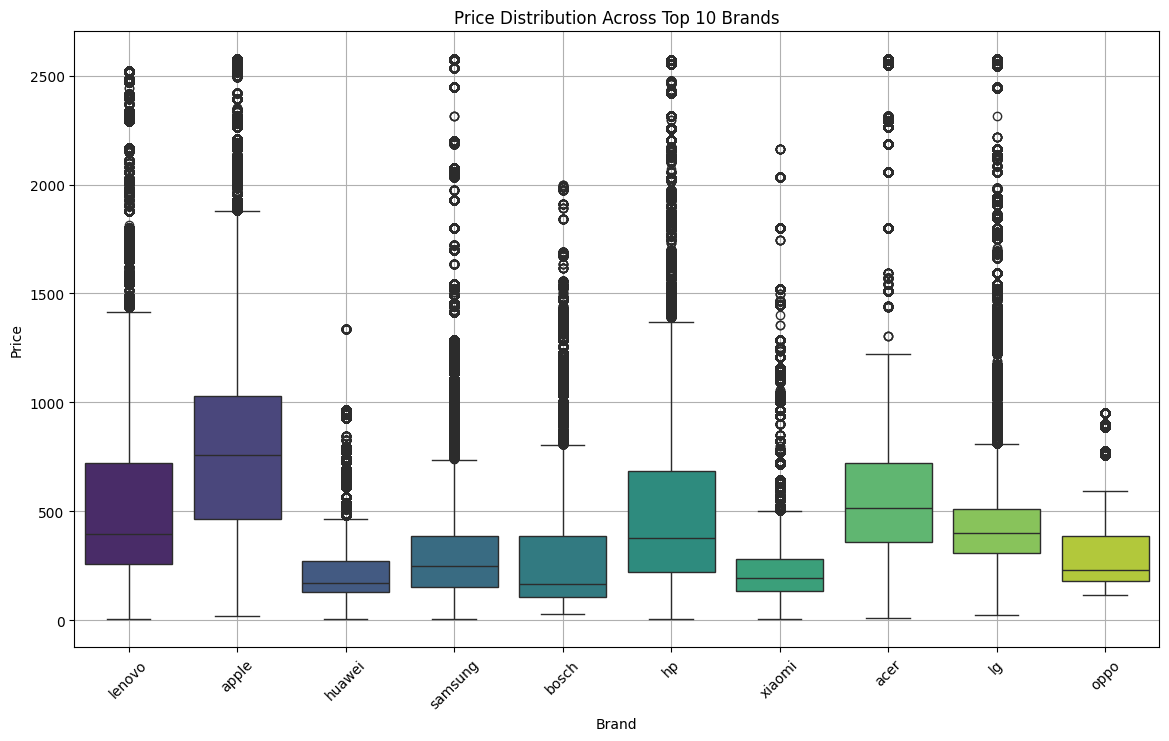

<Figure size 1200x600 with 0 Axes>

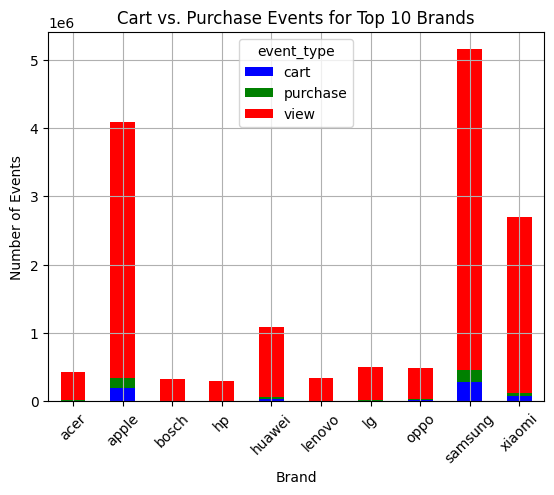

In [104]:
#11 How does the price distribution vary across the top 10 brands?

top_brands = df['brand'].value_counts().nlargest(10).index
filtered_df = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='brand', y='price', palette='viridis')
plt.title('Price Distribution Across Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#12 How often are products from each brand being added to a cart vs. being purchased for the top 10 brands?

# Limit to top 10 brands by event frequency
top_brands = df['brand'].value_counts().nlargest(10).index
top_brand_cart_purchase_events = df[df['brand'].isin(top_brands)]

# Group and plot
brand_cart_vs_purchase = top_brand_cart_purchase_events.groupby(['brand', 'event_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
brand_cart_vs_purchase.plot(kind='bar', stacked=True, color=['blue', 'green', 'red'])
plt.title('Cart vs. Purchase Events for Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Knowing the price distribution across the top 10 brands can be very important in trying to understand deeper relationships across the most popular brands. It gives us an insight into the positioning of the brands as premium brands may have a higher price distribution while budget brands might have lower prices. This also tells us the competitive landscape between these brands. Looking at the distributions of the brands can show they compare with each other within the same category. It can also tell us about the product quality as higher prices may be associated with a perceived higher quality while lower prices may not. It can help gain a deeper understanding into what brand may offer what type of product based on quality. 

In [105]:
#13 What is the average price for each category code and how does it compare to the overall average?

overall_avg_price = df['price'].mean()
avg_price_by_category = df.groupby('category_code')['price'].mean()

print(f'Overall Average Price: {overall_avg_price:.2f}')
print('\nAverage Price by Category Code:')
print(avg_price_by_category)


Overall Average Price: 352.88

Average Price by Category Code:
category_code
accessories.bag          59.687260
accessories.umbrella     25.427943
accessories.wallet       49.769211
apparel.belt             41.093946
apparel.costume         157.632625
                           ...    
sport.ski               265.406593
sport.snowboard         232.228461
sport.tennis             95.610266
sport.trainer           423.109890
stationery.cartrige      28.612102
Name: price, Length: 126, dtype: float64


In [106]:
#14 How does Price Distribution differ between purchased and non-purchased products?

df['purchased'] = df['price'] > 0
price_stats = df.groupby('purchased')['price'].describe()

print('Price Distribution Statistics by Purchase Status:')
print(price_stats)


Price Distribution Statistics by Purchase Status:
                count        mean         std   min     25%     50%     75%  \
purchased                                                                     
True       26534109.0  352.880297  381.134886  0.88  108.11  218.51  459.16   

               max  
purchased           
True       2574.07  


In [107]:
#15 What proportion of total spend is accounted for by each event type?

total_spend_by_event = df.groupby('event_type')['price'].sum()
total_spend = total_spend_by_event.sum()
proportion_by_event = total_spend_by_event / total_spend

print('Proportion of Total Spend by Event Type:')
print(proportion_by_event)


Proportion of Total Spend by Event Type:
event_type
cart        0.030825
purchase    0.021771
view        0.947404
Name: price, dtype: float64


In [108]:
#16 What are the mean, median, and mode of the price column?

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

print(f'Mean Price: {mean_price:.2f}')
print(f'Median Price: {median_price:.2f}')
print(f'Mode Price(s): {mode_price.tolist()}')


Mean Price: 352.88
Median Price: 218.51
Mode Price(s): [257.15]


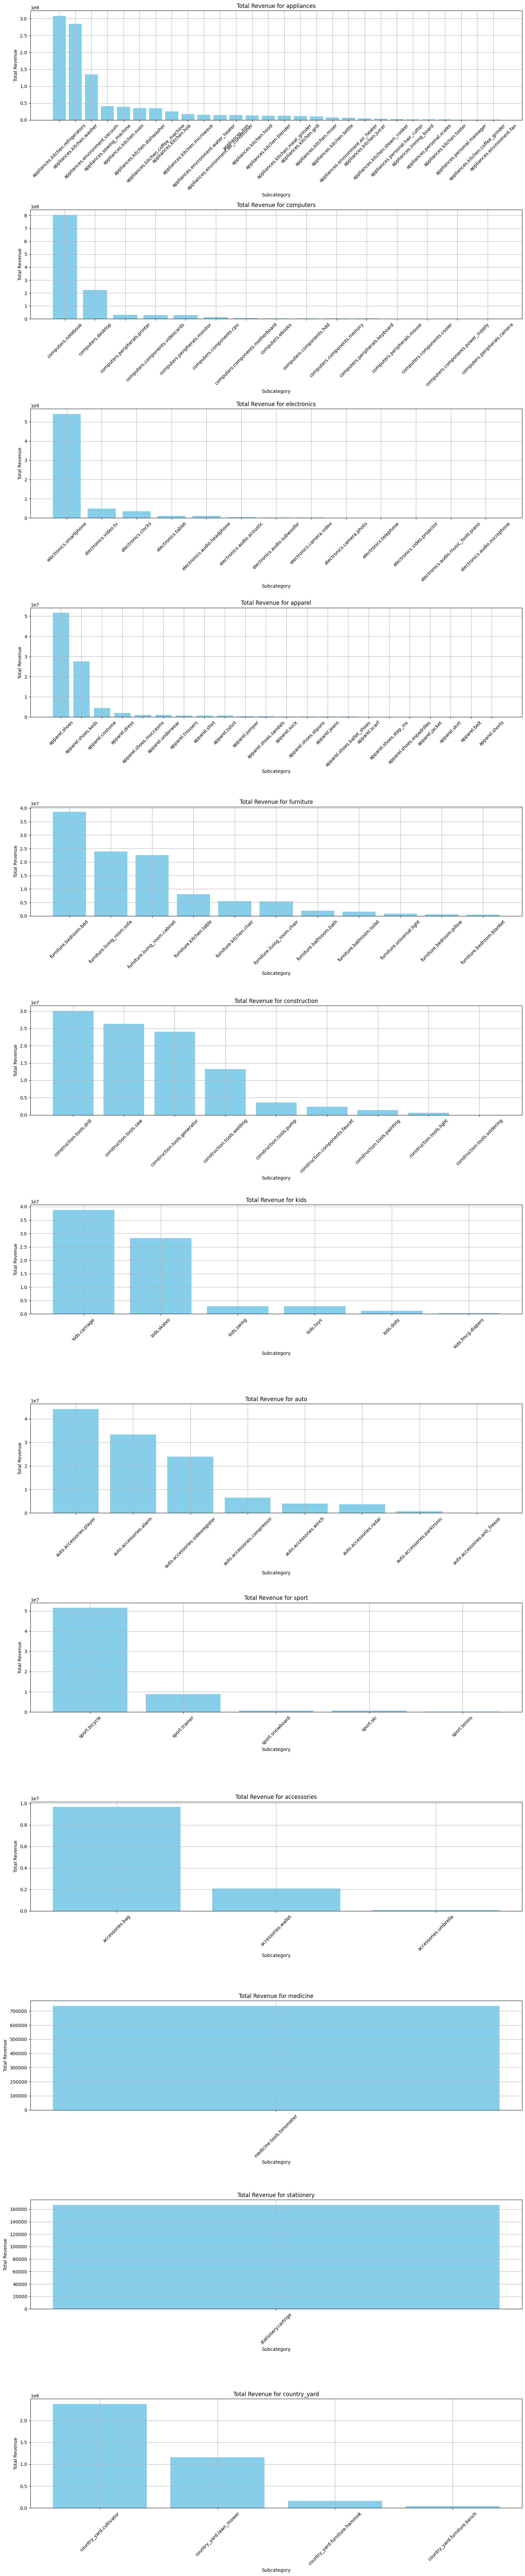

In [109]:
#17 What is the total revenue by product category

df['main_category'] = df['category_code'].apply(lambda x: x.split('.')[0] if pd.notnull(x) else x)

total_revenue_per_subcategory = df.groupby(['main_category', 'category_code'])['price'].sum()

main_categories = df['main_category'].unique()
fig, axes = plt.subplots(len(main_categories), 1, figsize=(16, 6 * len(main_categories)))

for i, category in enumerate(main_categories):
    subcategory_revenue = total_revenue_per_subcategory.loc[category].sort_values(ascending=False)
    axes[i].bar(subcategory_revenue.index, subcategory_revenue.values, color='skyblue')
    axes[i].set_title(f'Total Revenue for {category}')
    axes[i].set_xlabel('Subcategory')
    axes[i].set_ylabel('Total Revenue')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

There are several graphs here that show which item in each category generates the most revenue. These graphs can also help us to compare the revenue for each category. Looking at each product within each category can help prioritize inventory management, marketing efforts, and resource allocation for that specific product. That can also be replicated for each category. This can make it a lot easier for stores and companies to prepare the correct amount of products and marketing the most popular products to the consumer. 

In [110]:
#18 How many unique products are there per category?

unique_products_per_category = df.groupby('category_code')['product_id'].nunique()

# Print the unique products per category
print("Unique Products per Product Category:")
print(unique_products_per_category)

Unique Products per Product Category:
category_code
accessories.bag         1738
accessories.umbrella      37
accessories.wallet       504
apparel.belt              39
apparel.costume           70
                        ... 
sport.ski                238
sport.snowboard          139
sport.tennis             190
sport.trainer             73
stationery.cartrige      562
Name: product_id, Length: 126, dtype: int64


<Figure size 1200x600 with 0 Axes>

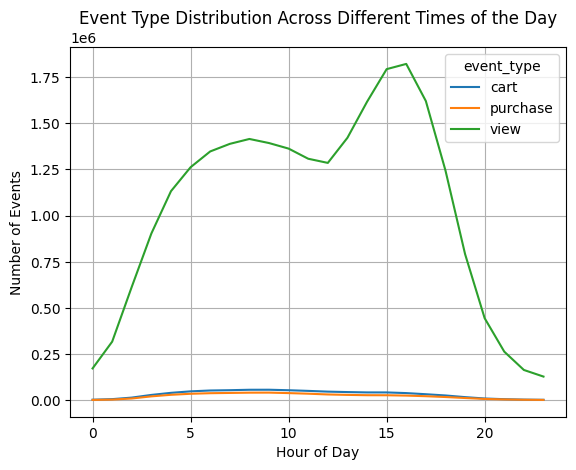

In [111]:
#19 How do event types differ across the day?

df['hour'] = pd.to_datetime(df['event_time']).dt.hour
events_by_hour = df.groupby(['event_type', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
events_by_hour.T.plot(kind='line')
plt.title('Event Type Distribution Across Different Times of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()


Conversion Rate from Cart to Purchase for Electronics:
category_code
electronics.audio.subwoofer            67.810811
electronics.camera.photo                3.222222
electronics.audio.microphone            2.240223
electronics.audio.acoustic              1.552817
electronics.audio.music_tools.piano     1.052369
electronics.clocks                      0.836929
electronics.telephone                   0.709561
electronics.camera.video                0.701403
electronics.tablet                      0.637005
electronics.smartphone                  0.634902
electronics.video.tv                    0.615244
electronics.audio.headphone             0.610449
electronics.video.projector             0.565517
dtype: float64


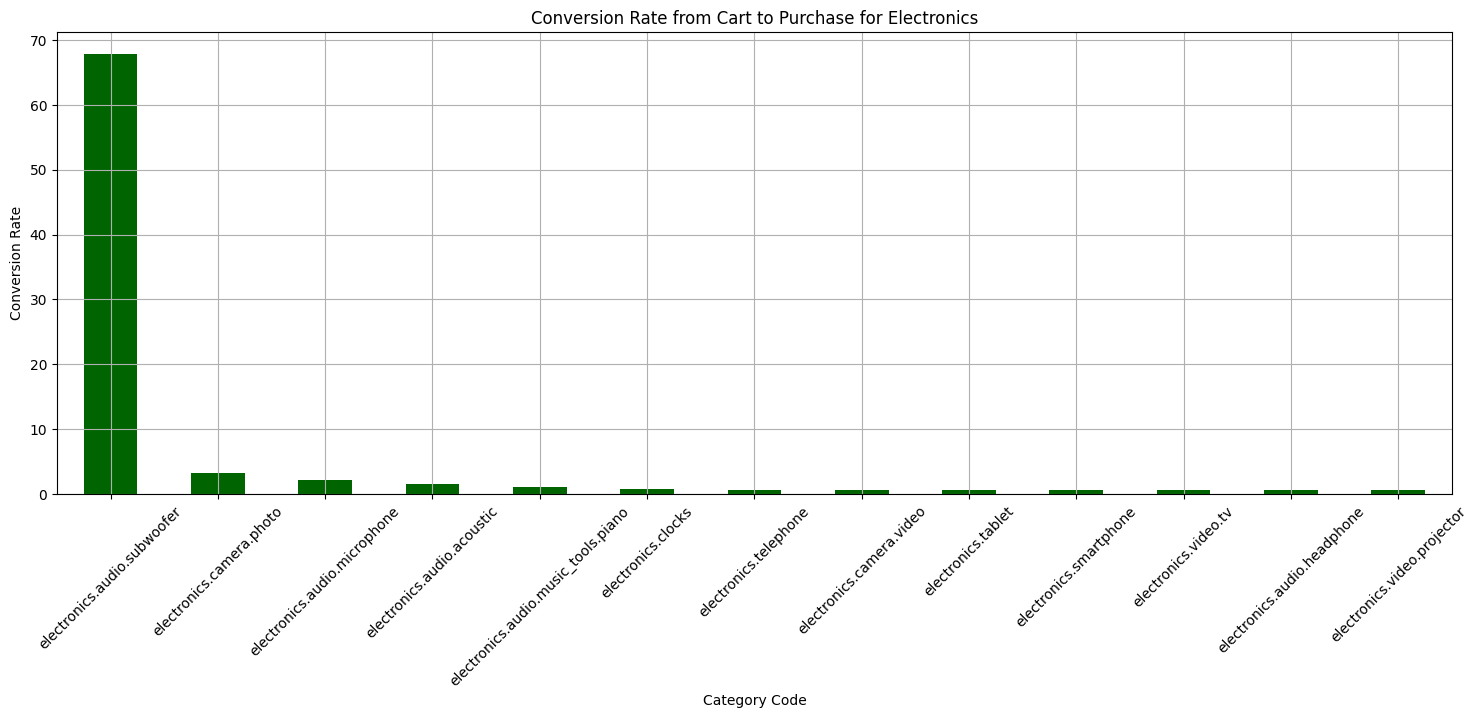

Conversion Rate from Cart to Purchase for Appliances:
category_code
appliances.ironing_board                  1.880000
appliances.environment.fan                1.625000
appliances.kitchen.oven                   1.389688
appliances.environment.air_conditioner    1.222222
appliances.kitchen.toster                 1.124352
appliances.personal.massager              1.111111
appliances.environment.air_heater         1.104596
appliances.kitchen.meat_grinder           1.095265
appliances.personal.scales                0.951359
appliances.kitchen.coffee_machine         0.947276
appliances.kitchen.kettle                 0.935849
appliances.kitchen.mixer                  0.931953
appliances.iron                           0.920010
appliances.personal.hair_cutter           0.902887
appliances.kitchen.blender                0.887657
appliances.kitchen.hood                   0.871963
appliances.sewing_machine                 0.871853
appliances.kitchen.juicer                 0.861154
appliances.kit

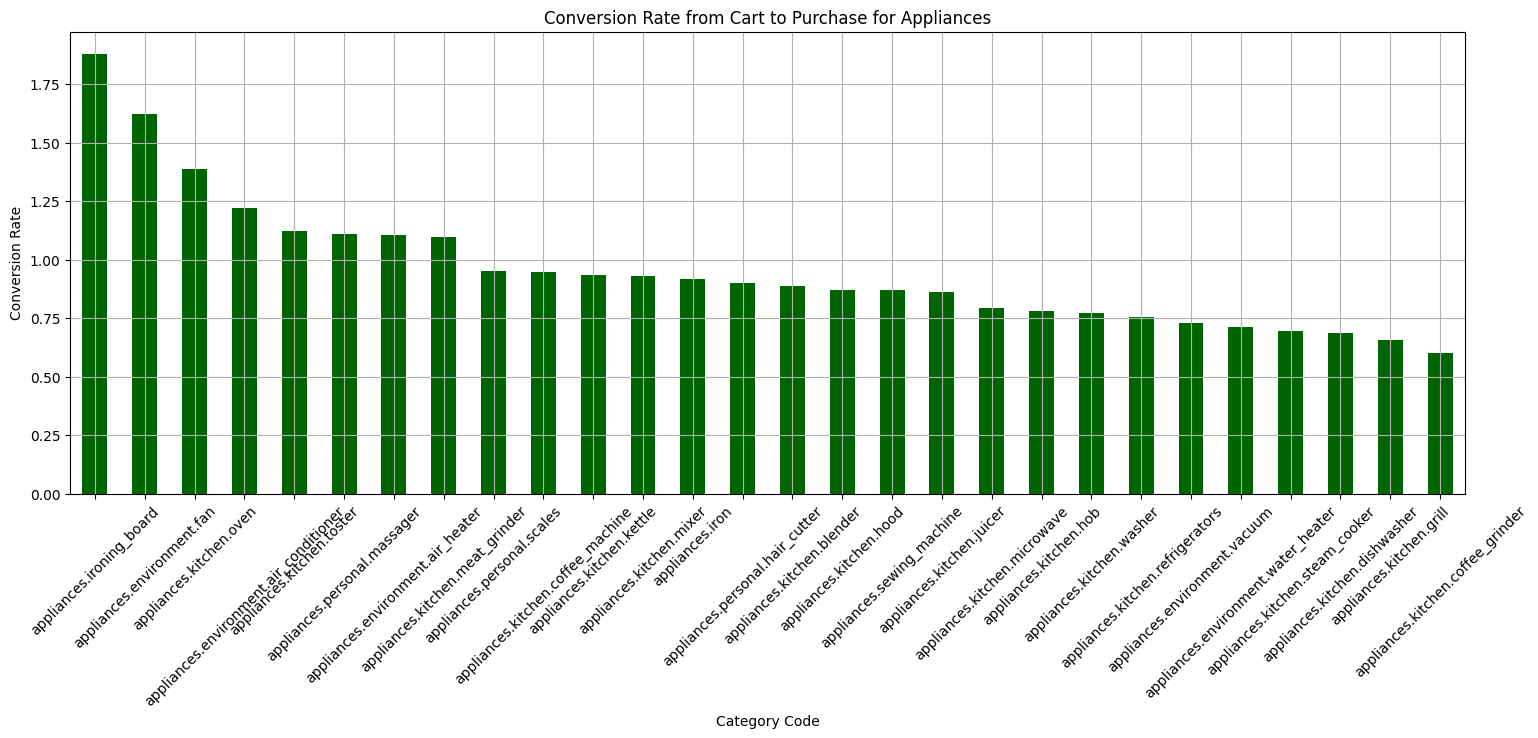

In [112]:
#20 What category has the highest conversion rate from cart to purchase?

categories = ['electronics', 'appliances']

# Loop through each category and generate a plot
for category in categories:
    filtered_cart_events = df[(df['event_type'] == 'cart') & (df['category_code'].str.contains(category))]
    filtered_purchase_events = df[(df['event_type'] == 'purchase') & (df['category_code'].str.contains(category))]

    conversion_rate = filtered_purchase_events.groupby('category_code').size() / filtered_cart_events.groupby('category_code').size()
    conversion_rate = conversion_rate.sort_values(ascending=False)

    print(f"Conversion Rate from Cart to Purchase for {category.capitalize()}:")
    print(conversion_rate)

    plt.figure(figsize=(18, 6))
    conversion_rate.plot(kind='bar', color='darkgreen')
    plt.title(f'Conversion Rate from Cart to Purchase for {category.capitalize()}')
    plt.xlabel('Category Code')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



Most Expensive Products:
          product_id    price       category_code
2699        21407288  2574.07  electronics.clocks
5895         1307275  2574.04  computers.notebook
14442        1305976  2159.62  computers.notebook
21356       21407287  2574.07  electronics.clocks
529822       1305976  2161.96  computers.notebook
1207859      1306325  2574.04  computers.notebook
5380769      1305976  2084.74  computers.notebook
8368136      1305976  2574.04  computers.notebook
25949809     1305976  2059.00  computers.notebook

Purchase frequency of the top 5 most expensive products:
product_id
1305976      666
1306325       16
1307275     1106
21407287     936
21407288     527
dtype: int64


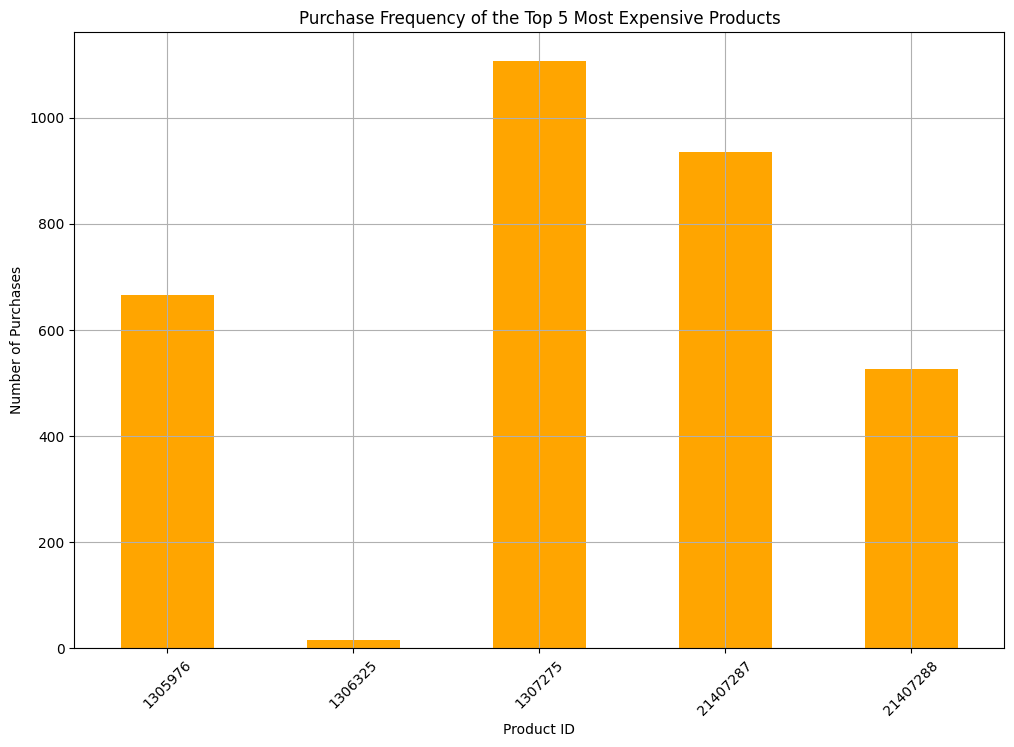

In [113]:
#21 What are the 5 priciest products?

top_5_products = df.groupby('product_id')['price'].max().nlargest(5)

product_info = df[df['product_id'].isin(top_5_products.index)][['product_id', 'price', 'category_code']].drop_duplicates()
print("Most Expensive Products:")
print(product_info)

#22 What is the purchase frequency of these top 5 most expensive products?

top_5_pf = df[df['product_id'].isin(top_5_products.index)].groupby('product_id').size()
print("\nPurchase frequency of the top 5 most expensive products:")
print(top_5_pf)


plt.figure(figsize=(12, 8))
top_5_pf.plot(kind='bar', color='orange')
plt.title('Purchase Frequency of the Top 5 Most Expensive Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

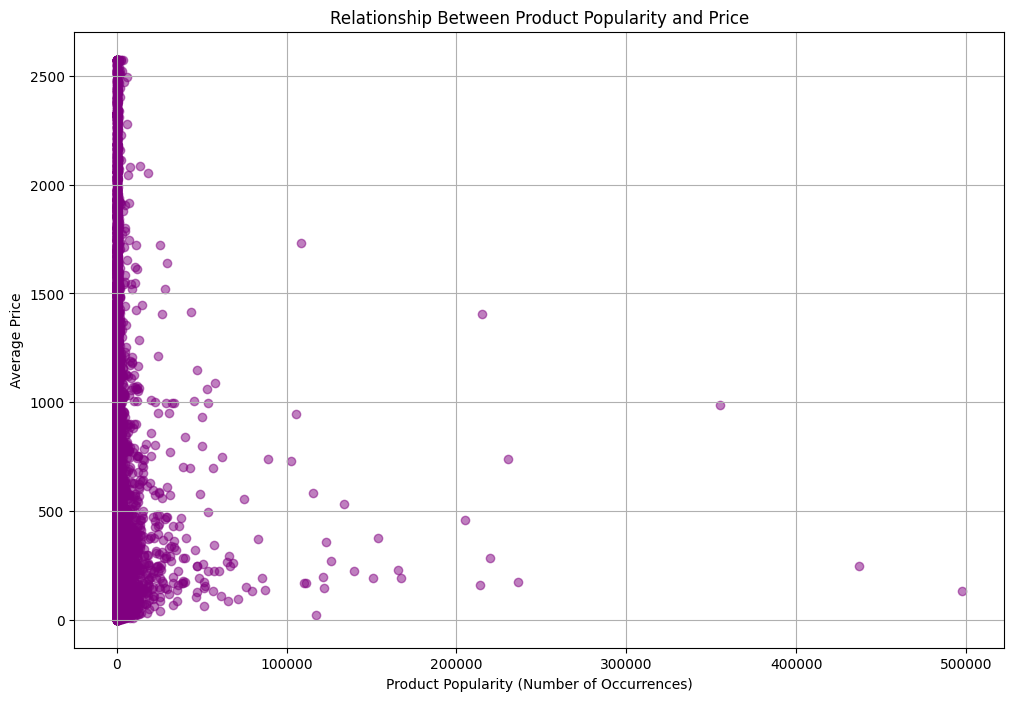

In [114]:
#23 How do prices and popularity affect each other?

product_popularity = df.groupby('product_id').size()
product_avg_price = df.groupby('product_id')['price'].mean()

plt.figure(figsize=(12, 8))
plt.scatter(product_popularity, product_avg_price, alpha=0.5, color='purple')
plt.title('Relationship Between Product Popularity and Price')
plt.xlabel('Product Popularity (Number of Occurrences)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

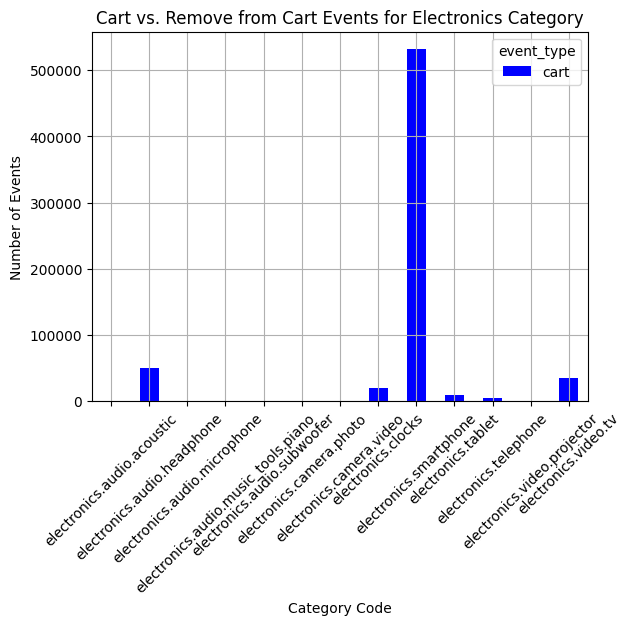

In [115]:
#24 What is the frequency of add to cart vs. remove from cart events for the electronics category?

# Filter cart events
# Filter for 'electronics' category and cart/remove events
electronics_cart_events = df[(df['category_code'].str.contains('electronics')) & 
                             (df['event_type'].isin(['cart', 'remove_from_cart']))]

# Group by event type for 'electronics' category
electronics_cart_action_frequency = electronics_cart_events.groupby(['category_code', 'event_type']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 6))
electronics_cart_action_frequency.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Cart vs. Remove from Cart Events for Electronics Category')
plt.xlabel('Category Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [116]:
#25 What are the top 5 users in terms of spending?
user_spending = df.groupby('user_id')['price'].sum().nlargest(5)
print("Top 5 Users by Total Spending:")
print(user_spending)

#26 What categories are the top 5 users spending the most in?
top_users = user_spending.index
user_category_preference = df[df['user_id'].isin(top_users)].groupby(['user_id', 'category_code']).size()
print("\nTop Users' Preferred Categories:")
print(user_category_preference)

Top 5 Users by Total Spending:
user_id
563459593    1993636.41
512365995    1492719.43
561163588    1451590.78
545925192    1247735.81
512845454     980004.57
Name: price, dtype: float64

Top Users' Preferred Categories:
user_id    category_code                         
512365995  apparel.costume                              2
           appliances.environment.air_conditioner      13
           appliances.environment.vacuum                9
           appliances.kitchen.microwave                 3
           appliances.kitchen.refrigerators            35
           computers.components.cooler                  6
           computers.notebook                           3
           electronics.audio.headphone                133
           electronics.audio.subwoofer                  1
           electronics.clocks                          57
           electronics.smartphone                    3586
           electronics.tablet                          46
           electronics.telephone 

<Figure size 1000x600 with 0 Axes>

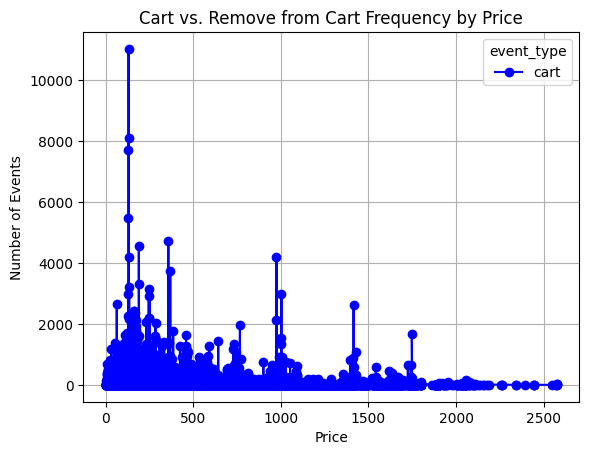

In [117]:
#27 Does a product price being higher mean more likely to be removed from cart?

cart_vs_remove = df[df['event_type'].isin(['cart', 'remove_from_cart'])].groupby(['price', 'event_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
cart_vs_remove.plot(kind='line', marker='o', color=['blue', 'red'])
plt.title('Cart vs. Remove from Cart Frequency by Price')
plt.xlabel('Price')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()


In [118]:
#28 Total number of purchases?

total_purchases = df[df['event_type'] == 'purchase'].shape[0]
print(f"\nTotal number of purchases: {total_purchases}")

# Find the most expensive product
most_expensive_product = df.loc[df['price'].idxmax()]

#29 Most expensive product?
most_expensive_product = df.loc[df['price'].idxmax()]
print(f"\nMost expensive product details:\n{most_expensive_product}")

#30 Total number of unique brands?
unique_brands = df['brand'].nunique()
print(f"\nNumber of unique brands: {unique_brands}")


Total number of purchases: 549446

Most expensive product details:
event_time                  2019-10-01 02:26:24+00:00
event_type                                       view
product_id                                   21407288
category_id                       2053013561579406073
category_code                      electronics.clocks
brand                                            rado
price                                         2574.07
user_id                                     527321544
user_session     b25dd047-7fec-489d-8b6b-a165cf1c7490
purchased                                        True
main_category                             electronics
hour                                                2
Name: 2699, dtype: object

Number of unique brands: 1731


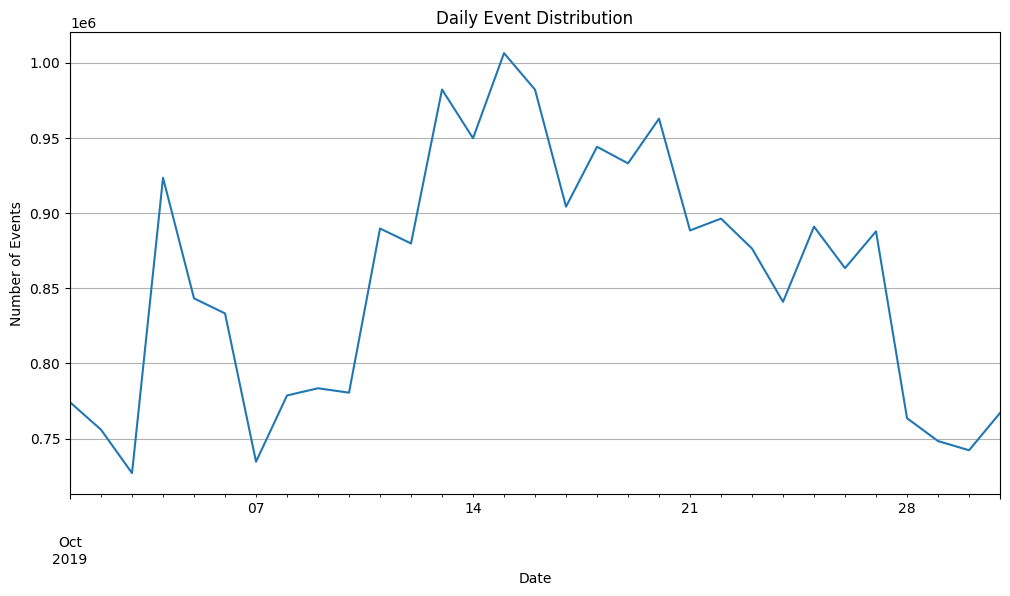

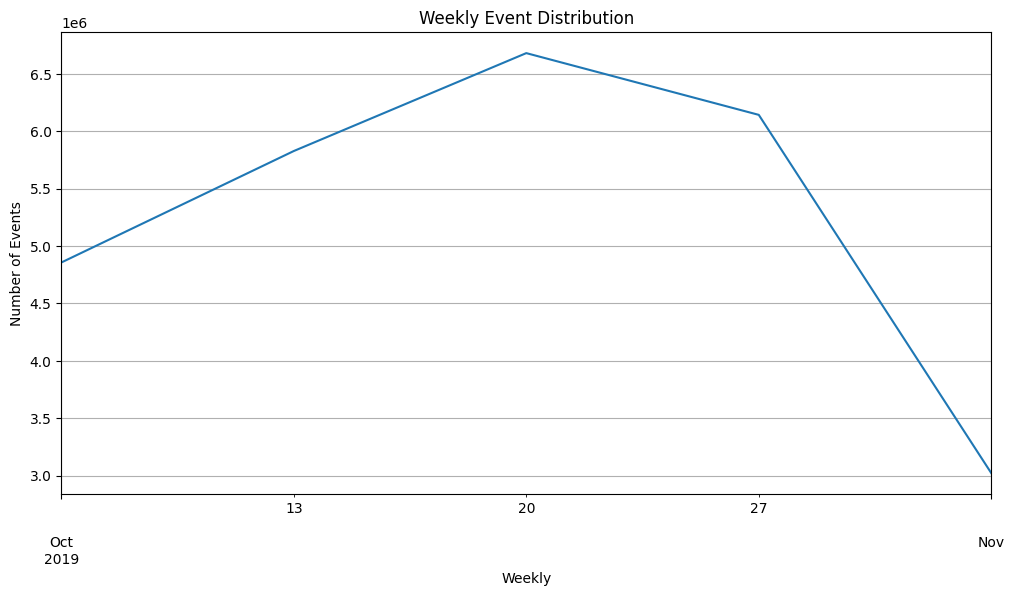

In [119]:
#31 What is the overall distribution of events over time? 

df.set_index('event_time', inplace=True)

df.resample('D').size().plot(figsize=(12,6), title='Daily Event Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

#32 What is the weekly trend of events? 

df.resample('W').size().plot(figsize=(12, 6), title='Weekly Event Distribution')
plt.xlabel('Weekly')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

This graph gives an insight into the distribution of events throughout the month. Meaning that items are being 'viewed','add_to_cart', 'remove_from_cart', or 'purchase'. This gives us information that the middle of the month has the highest rate of events. This shows the peak activity times for customer. This activity gives insight into when stores or companies should increase inventory and be prepared for a higher level of interaction with their products. 

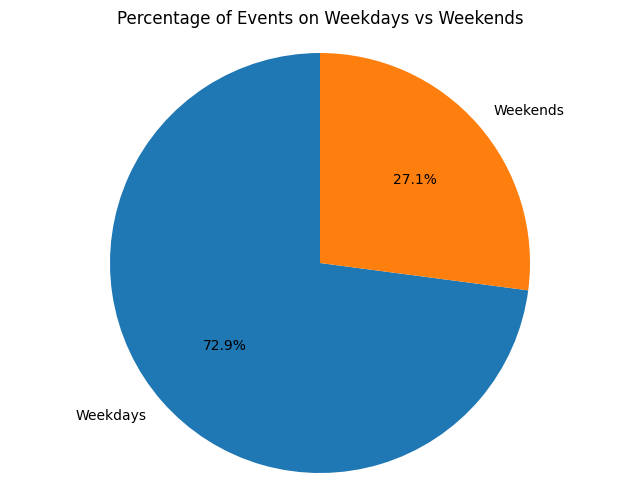

In [120]:
#33 Are events likelier to happen on weekends than on weekdays? 

weekdays = df[df.index.dayofweek < 5].shape[0]
weekends = df[df.index.dayofweek >= 5].shape[0]
labels = ['Weekdays', 'Weekends']
sizes = [weekdays, weekends]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Events on Weekdays vs Weekends')
plt.axis('equal')
plt.show()

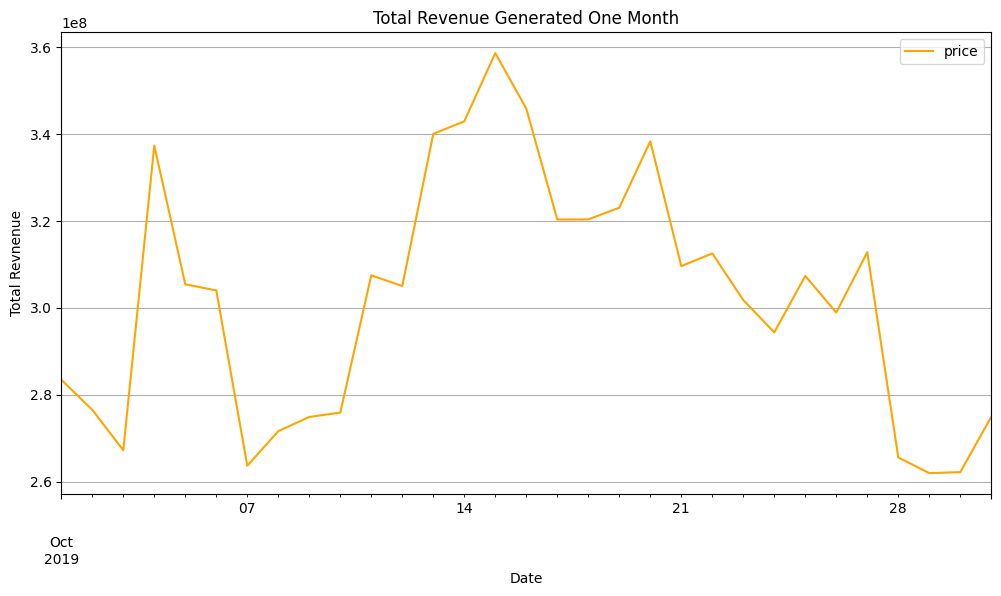

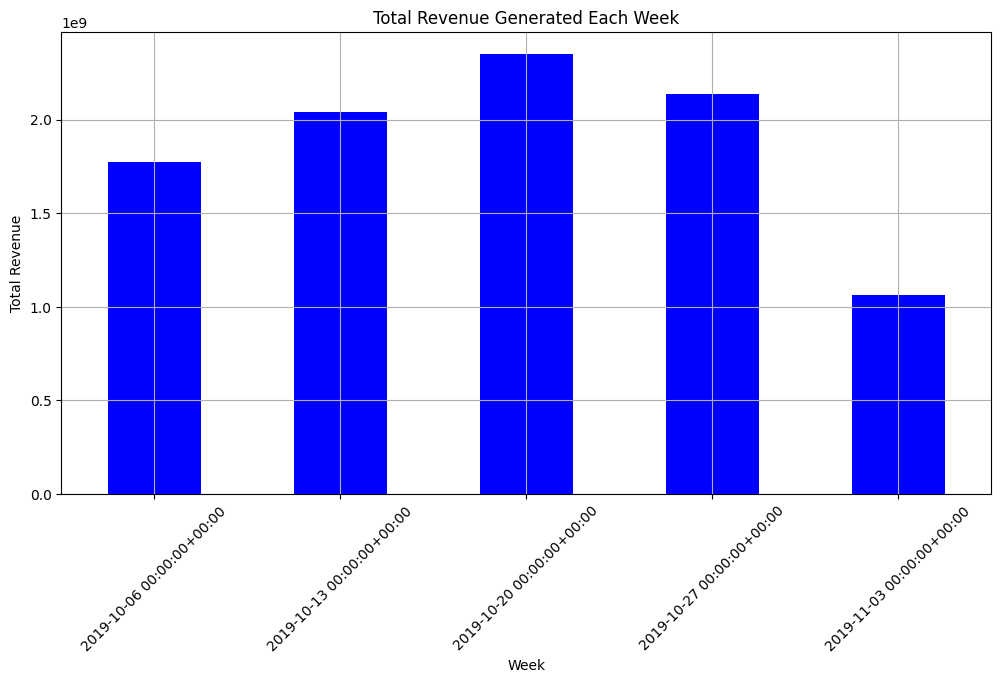

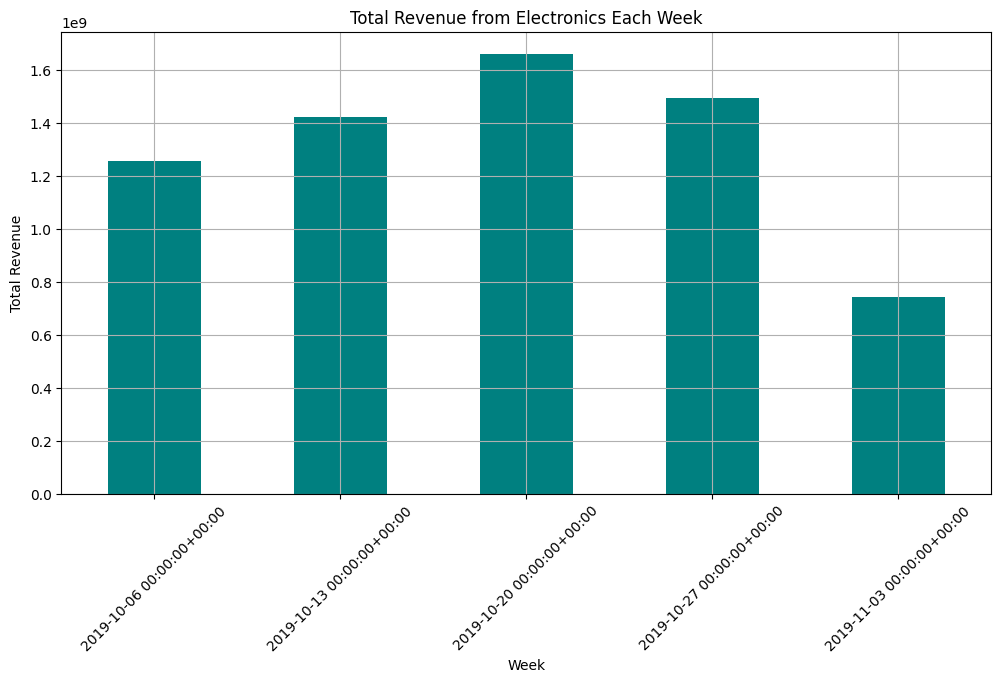

In [121]:
#34 What is the total revenue generated over a month? 

df.resample('D').agg({'price':'sum'}).plot(figsize=(12,6), title='Total Revenue Generated One Month', color='orange')
plt.xlabel('Date')
plt.ylabel('Total Revnenue')
plt.grid(True)
plt.show()

#35 How much total revenue was generated each week? 

total_weekly_revenue = df.resample('W')['price'].sum()
plt.figure(figsize=(12,6))
total_weekly_revenue.plot(kind='bar', color='blue')
plt.title('Total Revenue Generated Each Week')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#36 What is the weekly revenue of electronics? 

category_weekly_revenue = df[df['category_code'].str.contains('electronics')].resample('W')['price'].sum()

plt.figure(figsize=(12,6))
category_weekly_revenue.plot(kind='bar', color='teal')
plt.title(f'Total Revenue from Electronics Each Week')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

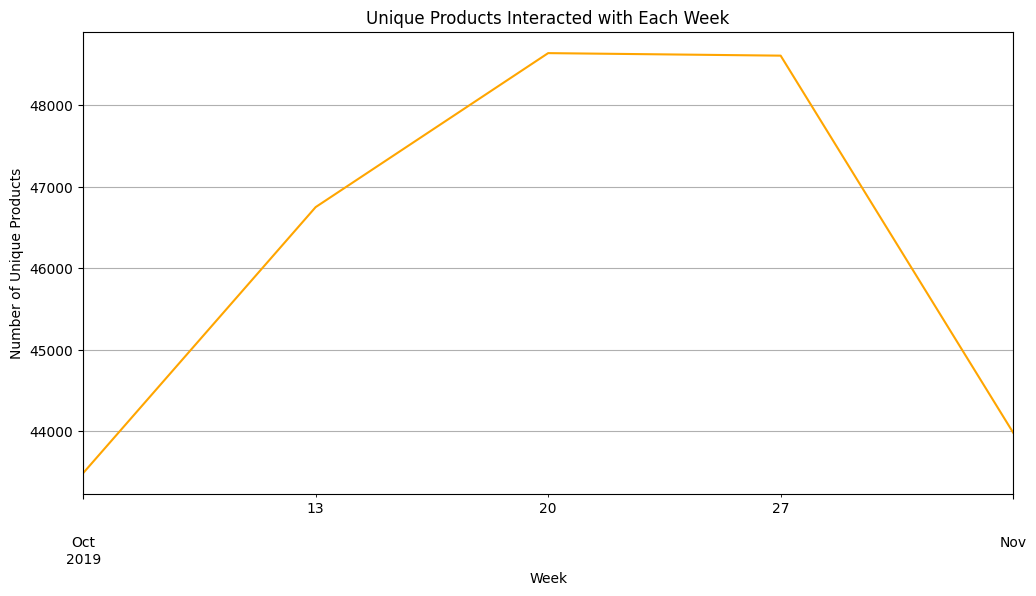

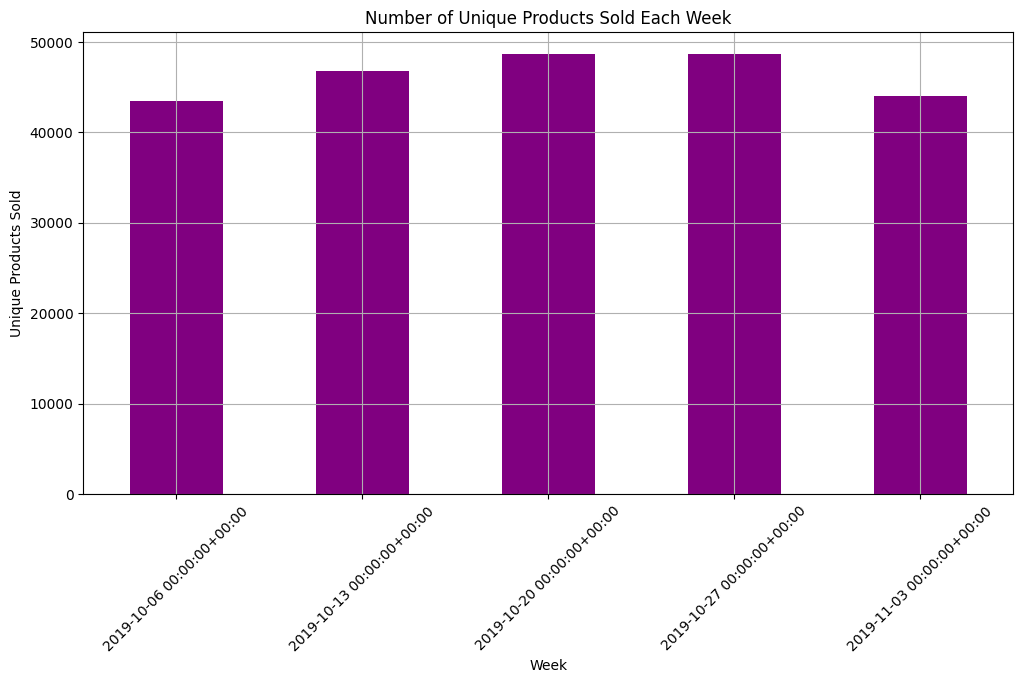

In [122]:
#37 How many unique products are interacted with each week? 

unique_products = df.resample('W')['product_id'].nunique()
unique_products.plot(figsize=(12,6), title = 'Unique Products Interacted with Each Week', color='orange')
plt.xlabel('Week')
plt.ylabel('Number of Unique Products')
plt.grid(True)
plt.show()

#38 How many unique products are sold each week? 

unique_weekly_products = df.resample('W')['product_id'].nunique()
plt.figure(figsize=(12,6))
unique_weekly_products.plot(kind='bar', color='purple')
plt.title('Number of Unique Products Sold Each Week')
plt.xlabel('Week')
plt.ylabel('Unique Products Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

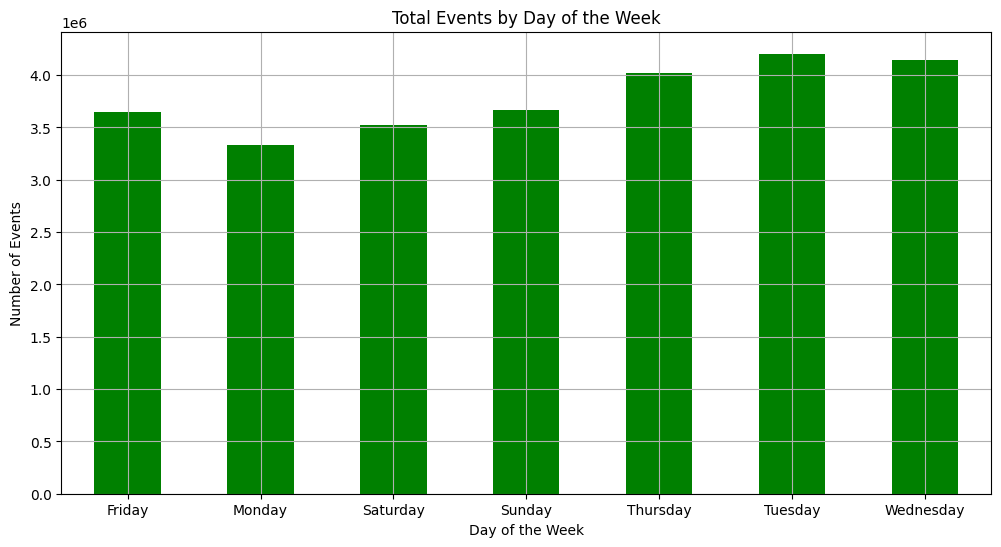

In [123]:
#39 What is the distribution of events based on the day of the week? 

daily_events = df.resample('D').size()
daily_events_weekday = daily_events.groupby(daily_events.index.day_name()).sum()
plt.figure(figsize=(12,6))
daily_events_weekday.plot(kind='bar', color='green')
plt.title('Total Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

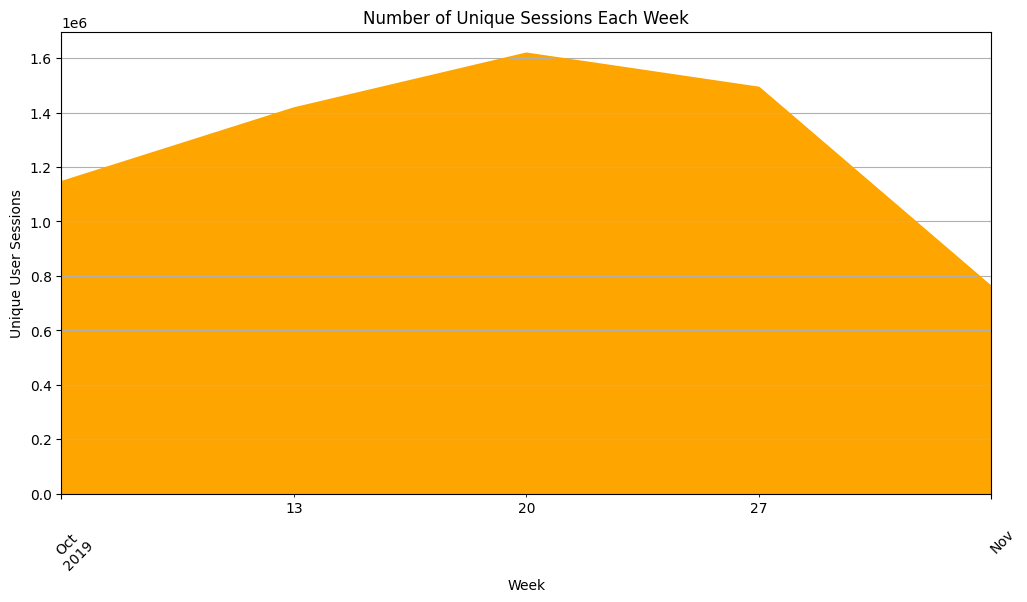

In [124]:
#40 How do user sessions vary by week? 

weekly_user_sessions = df.resample('W')['user_session'].nunique()
plt.figure(figsize=(12,6))
weekly_user_sessions.plot(kind='area', color='orange')
plt.title('Number of Unique Sessions Each Week')
plt.xlabel('Week')
plt.ylabel('Unique User Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Total purchases on weekdays:  405143
Total purchases on weekends:  144303


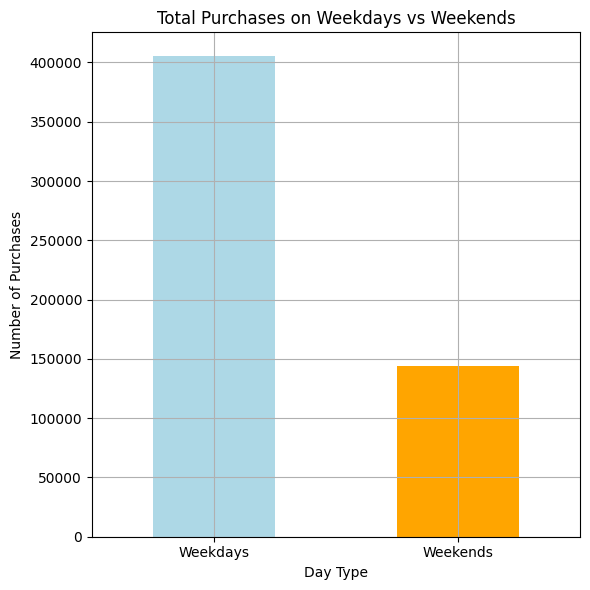

In [127]:
#41 How many users purchase on weekends vs. Weekdays.
# Create 'weekend' column: True for weekends, False for weekdays
df['weekend'] = df['event_time'].dt.dayofweek >= 5

# Calculate purchases on weekdays and weekends
purchases_weekdays = df[(df['event_type'] == 'purchase') & ~df['weekend']].shape[0]
purchases_weekends = df[(df['event_type'] == 'purchase') & df['weekend']].shape[0]

# Print the results
print("Total purchases on weekdays: ", purchases_weekdays)
print("Total purchases on weekends: ", purchases_weekends)

# Plot the comparison
purchase_counts = pd.Series([purchases_weekdays, purchases_weekends], index=['Weekdays', 'Weekends'])

plt.figure(figsize=(6, 6))
purchase_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Total Purchases on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


Looking at how many purchases happen on weekends will help with advertising and give powerful insight into how purchasing trends are as a whole. For example, targeted ads may be more useful if they appear primarily on weekends, as a customer is more likely to see them at any time of day when compared to a weekday, where their leisure hours are less plentiful. This can save advertising agencies money by only considering to run ads at very specific time periods.

Count of different event types:
event_type
view        25200302
cart          784361
purchase      549446
Name: count, dtype: int64


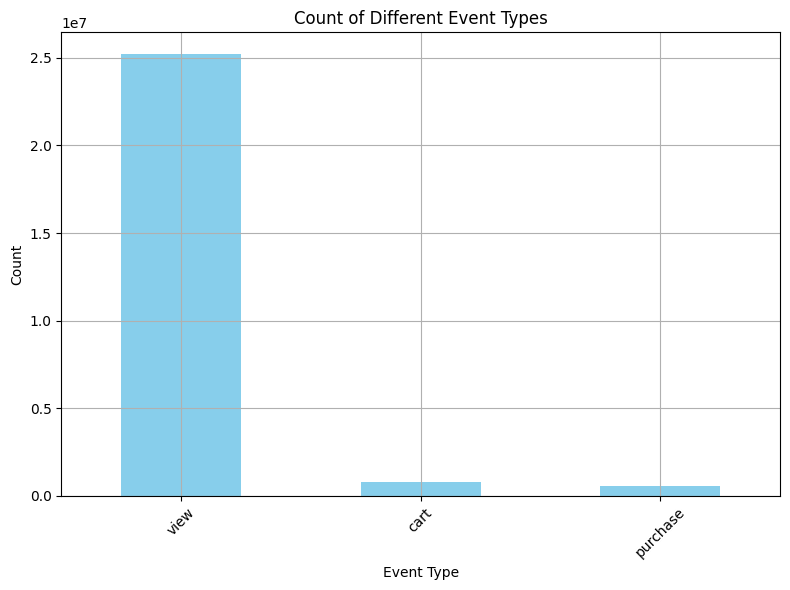

In [128]:
#42 What is the overall count of different event types

event_type_counts = df['event_type'].value_counts()


print("Count of different event types:")
print(event_type_counts)
plt.figure(figsize=(8, 6))
event_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Different Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

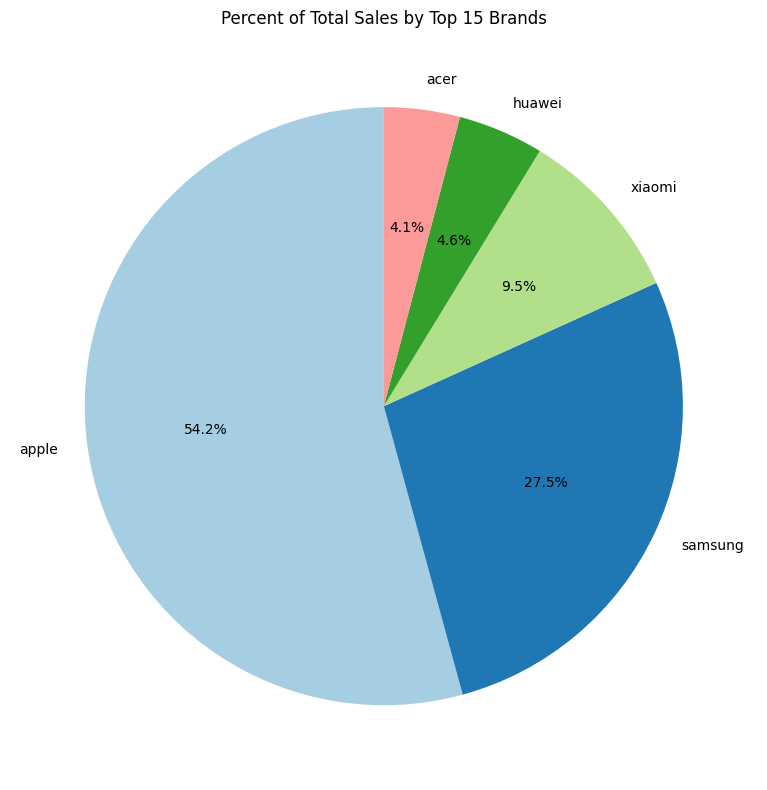

In [129]:
#43 What percent of total sales does each brand contribute?

net_sales_per_brand = df.groupby('brand')['price'].sum()


net_sales = net_sales_per_brand.sum()
percent_per_brand = (net_sales_per_brand/net_sales) * 100
top_15_brands = percent_per_brand.nlargest(5)
plt.figure(figsize=(8, 8))
top_15_brands.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percent of Total Sales by Top 15 Brands')
plt.ylabel('') 
plt.tight_layout()
plt.show()

Top 10 brands by revenue:
brand
apple      3.423859e+09
samsung    1.736601e+09
xiaomi     5.997949e+08
huawei     2.926621e+08
acer       2.584930e+08
lg         2.431125e+08
lenovo     1.810935e+08
oppo       1.483987e+08
hp         1.465236e+08
asus       1.352044e+08
Name: price, dtype: float64


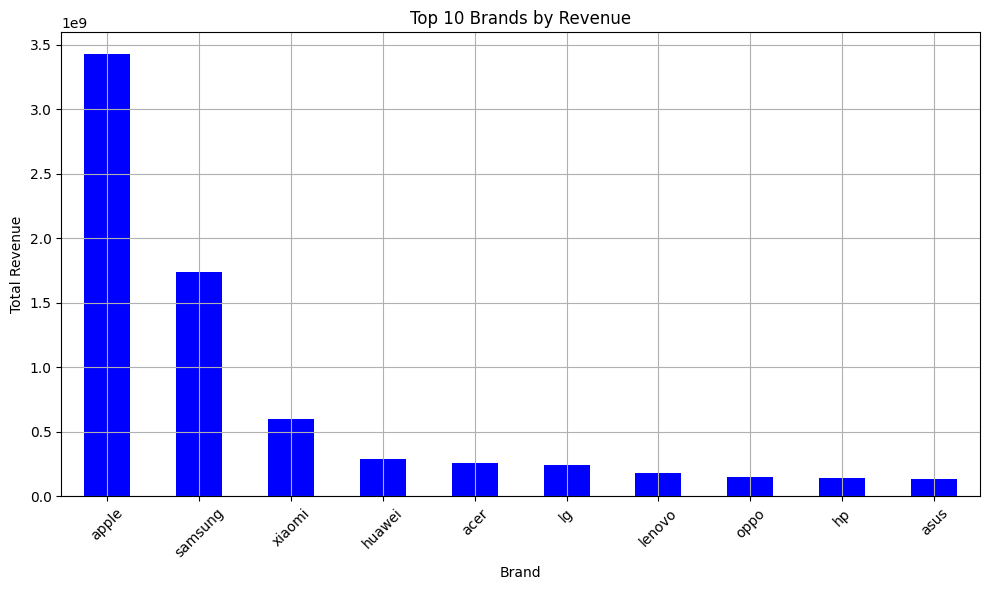

In [130]:
#44 What are the top 10 brands has the highest overall revenue?

top_brands_revenue = df.groupby('brand')['price'].sum().nlargest(10)


print("Top 10 brands by revenue:")
print(top_brands_revenue)
plt.figure(figsize=(10, 6))
top_brands_revenue.plot(kind='bar', color='blue')
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Average price for purchased vs. non-purchased products:
event_type
Not Purchased    367.978876
Purchased        371.003756
Name: price, dtype: float64


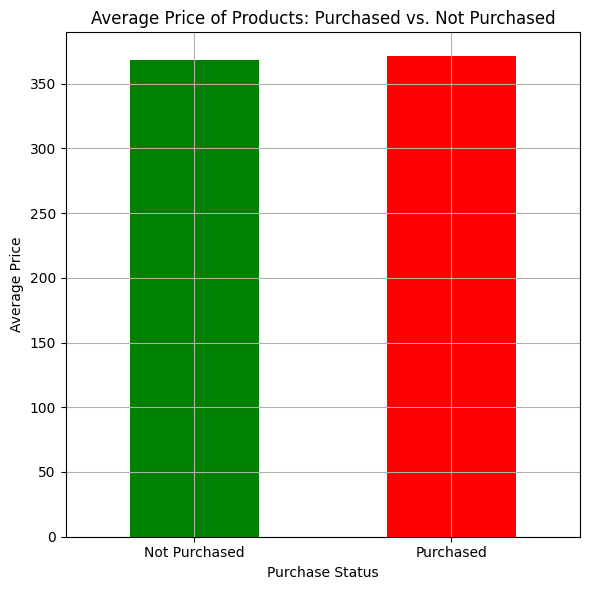

In [131]:
#45 Avg price of products purchased vs. non - purchased

# Average price for purchased vs. non-purchased products
avg_price_purchase_status = df.groupby(df['event_type'].map({'purchase': 'Purchased', 'cart': 'Not Purchased', 'remove_from_cart': 'Not Purchased'}))['price'].mean()


print("Average price for purchased vs. non-purchased products:")
print(avg_price_purchase_status)
plt.figure(figsize=(6, 6))
avg_price_purchase_status.plot(kind='bar', color=['green', 'red'])
plt.title('Average Price of Products: Purchased vs. Not Purchased')
plt.xlabel('Purchase Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\2575821508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics_df['day_of_week'] = electronics_df['event_time'].dt.day_name()


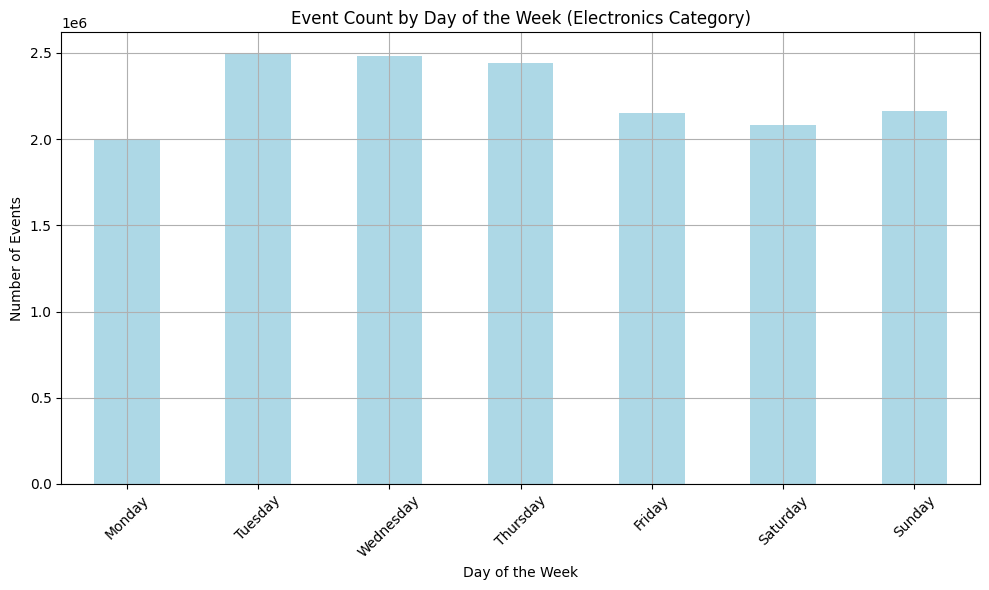

In [132]:
#46 How much activity is on weekdays vs weekends for the electronics category?

# Filter for electronics category
electronics_df = df[df['category_code'].str.contains('electronics', na=False)]

electronics_df['day_of_week'] = electronics_df['event_time'].dt.day_name()

day_of_week_activity = electronics_df.groupby('day_of_week').size()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_activity = day_of_week_activity.reindex(day_order)


plt.figure(figsize=(10, 6))
day_of_week_activity.plot(kind='bar', color='lightblue')
plt.title('Event Count by Day of the Week (Electronics Category)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Similar to #31, but broader in scope, this shows overall activity on weekends vs weekdays. This may be more useful to the site itself, as it can figure out what periods of time have a higher rate to charge for advertisers, given network traffic and activity. There may be periods of outliers on weekdays where more activity is happening, as as such, that block of time can be made to cost more.

C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\2412429628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['day_of_week'] = purchase_events['event_time'].dt.dayofweek


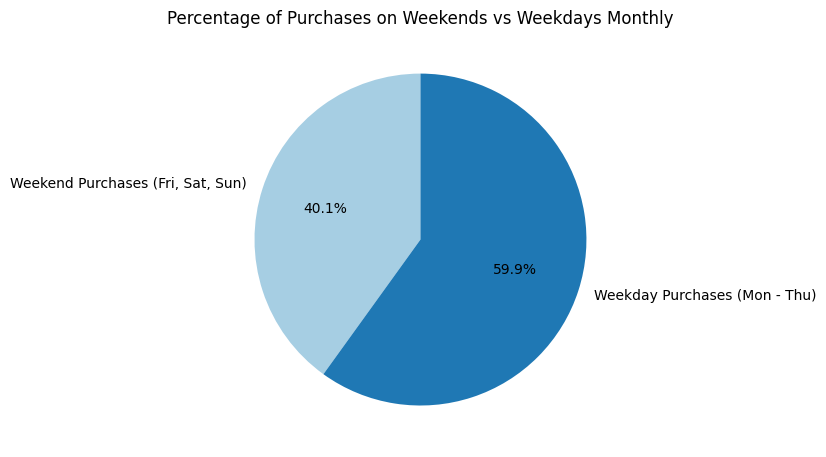

In [133]:
#47 Of the Purchases on Weekends, How much do they contribute to overall monthly purchases?

purchase_events = df[df['event_type'] == 'purchase']
purchase_events['day_of_week'] = purchase_events['event_time'].dt.dayofweek

weekend_purchases = purchase_events[purchase_events['day_of_week'].isin([4, 5, 6])]
total_purchases = purchase_events.shape[0]

weekend_purchases_count = weekend_purchases.shape[0]
weekday_purchases_count = total_purchases - weekend_purchases_count

labels = ['Weekend Purchases (Fri, Sat, Sun)', 'Weekday Purchases (Mon - Thu)']
sizes = [weekend_purchases_count, weekday_purchases_count]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Purchases on Weekends vs Weekdays Monthly')
plt.tight_layout()
plt.show()

C:\Users\abaig\AppData\Local\Temp\ipykernel_20892\3548653795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['day_of_week'] = purchase_events['event_time'].dt.dayofweek


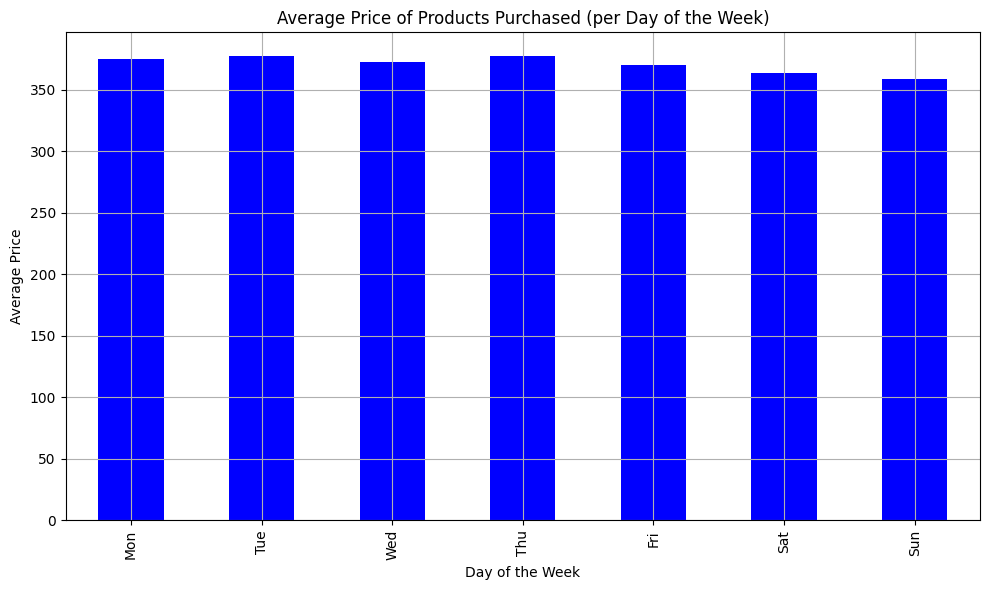

In [134]:
#48 Avg amount of purchases each day of the week?

purchase_events = df[df['event_type'] == 'purchase']

purchase_events['day_of_week'] = purchase_events['event_time'].dt.dayofweek

avg_price_per_day_of_week = purchase_events.groupby('day_of_week')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_per_day_of_week.plot(kind='bar', color='blue')
plt.title('Average Price of Products Purchased (per Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.tight_layout()
plt.show()

Count of each event type by hour of the day:
event_type   cart  purchase     view
event_time                          
0            3250      2081   172615
1            6316      3932   317466
2           14654      9804   614306
3           29117     21343   903032
4           40427     29815  1131860
5           48469     35344  1261515
6           53084     38465  1346805
7           54738     39872  1387831
8           57032     41324  1414354
9           57219     41621  1392242
10          54523     39014  1362147
11          50973     35763  1307294
12          46927     31637  1284788
13          44558     29294  1420768
14          42678     27601  1615568
15          42618     27383  1792237
16          39069     25522  1820470
17          32907     22206  1619432
18          26203     17782  1243899
19          17194     12388   791588
20           9848      7412   444178
21           6024      4777   263300
22           3806      2963   164186
23           2727      2103   

<Figure size 1200x600 with 0 Axes>

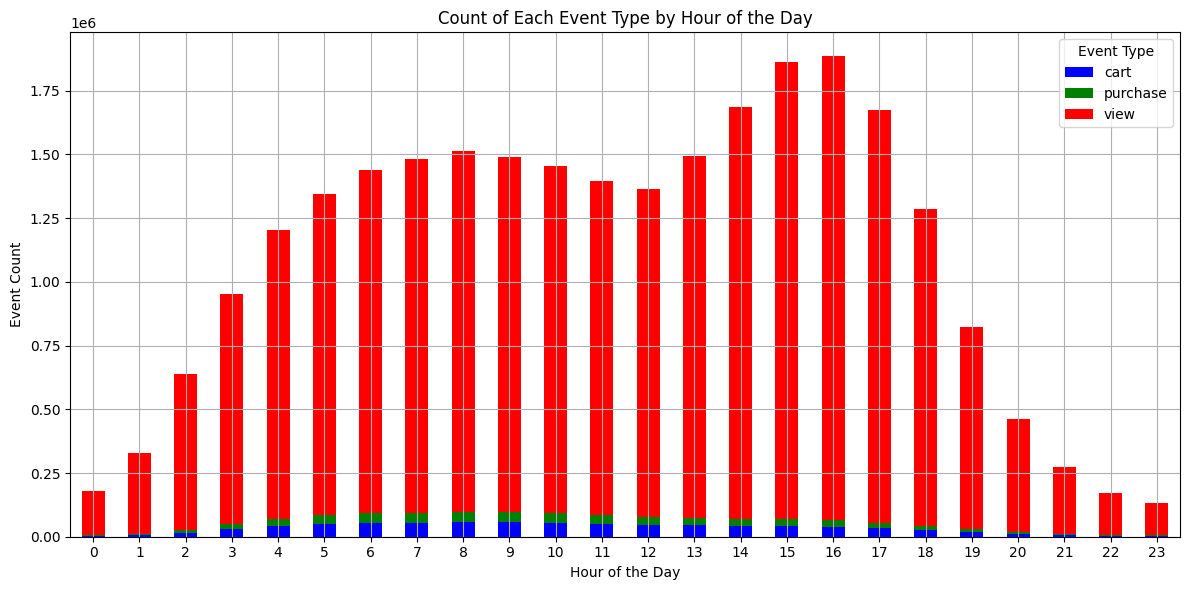

Total revenue generated by hour of the day:
event_time
0     6.192368e+07
1     1.105719e+08
2     2.136296e+08
3     3.239553e+08
4     4.138636e+08
5     4.663924e+08
6     5.002090e+08
7     5.151088e+08
8     5.268782e+08
9     5.231767e+08
10    5.090181e+08
11    4.919057e+08
12    4.835580e+08
13    5.267494e+08
14    5.907160e+08
15    6.499541e+08
16    6.637588e+08
17    5.972013e+08
18    4.737943e+08
19    3.112298e+08
20    1.799981e+08
21    1.110130e+08
22    6.785891e+07
23    5.089931e+07
Name: price, dtype: float64


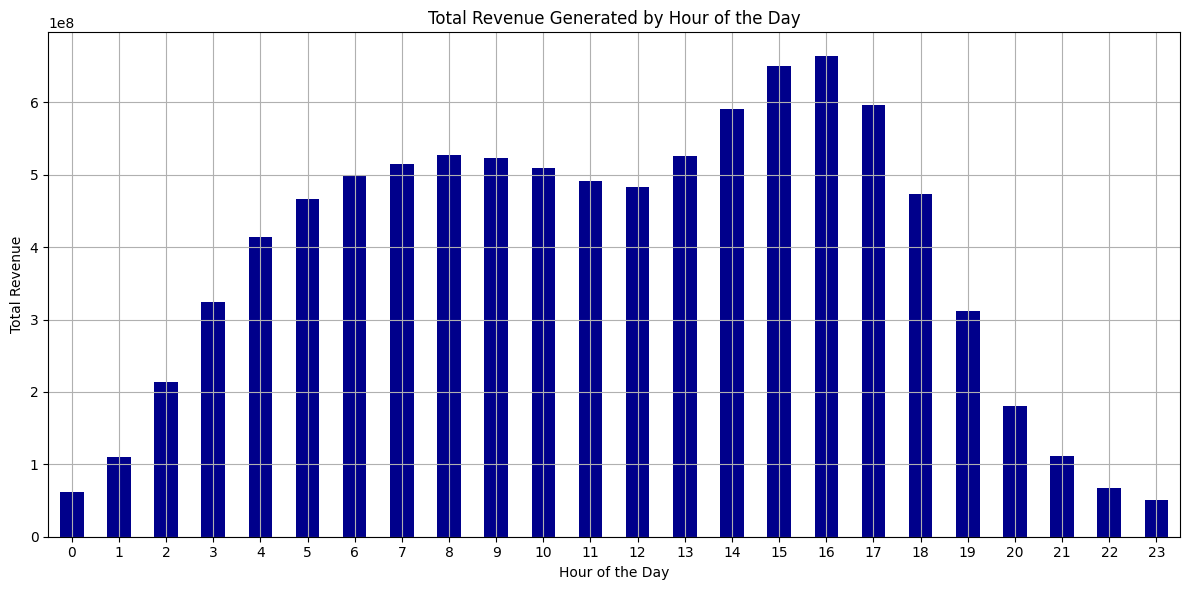

In [135]:
#49 Count of each event type by hour of the day?

event_count_hourly = df.groupby([df['event_time'].dt.hour, 'event_type']).size().unstack(fill_value=0)


print("Count of each event type by hour of the day:")
print(event_count_hourly)
plt.figure(figsize=(12, 6))
event_count_hourly.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Count of Each Event Type by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


#50 How much revenue is generated by hour of the day?

# Total revenue by hour of the day
df['event_time'] = pd.to_datetime(df['event_time'])
total_revenue_by_hour = df.groupby(df['event_time'].dt.hour)['price'].sum()


print("Total revenue generated by hour of the day:")
print(total_revenue_by_hour)
plt.figure(figsize=(12, 6))
total_revenue_by_hour.plot(kind='bar', color='darkblue')
plt.title('Total Revenue Generated by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()